<h2 style='background:#11489c; border:0; color:white'><center>A/B Testing</center></h2>

* A/B testing a landing page is a very powerful way to get many more conversions out of already existing campaigns, as the test gives you the data you need to make the most of your budget, which increases your overall returns

* Businesses are happy they are getting traffic, but at the same time, they are unhappy they’re unable to convert that traffic into customers. Every business struggles with unqualified leads, be it B2B, E-commerce, media and publishing, etc.

* These conversion metrics are always affected by some very common problems, such as issues in the conversion funnel, drops-offs on payment pages, or other common issues

* The data from the test lets you know what words, phrases, image, videos and other such elements on the landing page work best. These may be minor changes but they can create a major improvement in the conversion rate

<a href="https://ibb.co/ZBpR4jN"><img src="https://i.ibb.co/6H7c9MN/AB-Test-Example.png" alt="AB-Test-Example" border="0"></a>

* Comparing Two Group Means (Independent Two-Sample T-Test)
* Parametric Comparison
* Nonparametric Comparison
* Two Group Ratio Comparison (Two Sample Ratio Test)
* Mean Comparison of More than Two Groups (ANOVA)


<h2 style='background:#11489c; border:0; color:white'><center>Sections</center></h2>

1. [Set up the Hypothesis](#1)
2. [Assumption Check](#2)
    * 2.1 [Normality Assumption](#2.1)
    * 2.2 [Variance Homogeneity](#2.2)
3. [Implementation of the Hypothesis](#3)
    * HO red if p-value < 0.05
    * Independent two-sample t-test (parametric test) if assumptions are met
    * Mannwhitneyu test if assumptions are not provided (non-parametric test)


<h2 style='background:#11489c; border:0; color:white'><center>Note</center></h2>
    
   * Number 2 directly if normality is not achieved. If variance homogeneity is not provided, an argument is entered for number 1
   * It can be useful to perform outlier analysis and correction before normality analysis


<h2 style='background:#11489c; border:0; color:white'><center>About the Dataset</center></h2>

* Impression – Ad views
* Click – Click
* Indicates the number of clicks on the displayed ad.
* Variables
* Purchase – Purchase
* Indicates the number of products purchased after the ads clicked.
* Earning – Earning
* Boiler obtained after purchased products

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import \
    ttest_1samp, \
    shapiro, \
    levene, \
    ttest_ind, \
    mannwhitneyu, \
    pearsonr, \
    spearmanr, \
    kendalltau, \
    f_oneway, \
    kruskal
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
!pip install openpyxl

     |████████████████████████████████| 251 kB 3.5 MB/s            


In [3]:
data_control = pd.read_excel("../input/ab-testing/ab_testing.xlsx", sheet_name="Control Group")
data_test = pd.read_excel("../input/ab-testing/ab_testing.xlsx", sheet_name="Test Group")

In [4]:
data_control.head()
data_control.describe()
data_control.columns

Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')

In [5]:
data_control = data_control[['Impression', 'Click', 'Purchase', 'Earning']]
data_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [6]:
data_test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [7]:
data_test = data_test[['Impression', 'Click', 'Purchase', 'Earning']]
data_test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


<a id = "1"></a><br>
#### 1. Set up the Hypothesis

- There is no statistically significant difference between the return of
- H0: "Average bidding" and the return of "maximum bidding"
- H1: There is a difference

In [8]:
data_control.groupby("Click")['Purchase'].mean() #Before
data_test.groupby("Click")['Purchase'].mean() #The next tried method also increased, but did it increase by chance?
data_control["Purchase"].mean() #550.894058
data_test["Purchase"].mean() #582.106096 an increase is observed

582.1060966484675

<a id = "2"></a><br>
#### 2. Assumption Check
    
- H0: Assumption of normal distribution is provided.
- H1: not provided.

 <a id = "2.1"></a><br>
 #### 2.1. Normality Assumption

In [9]:
test_stat, pvalue = shapiro(data_control['Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.5891
# test_stat = 0.9773
# H0 cannot be rejected
# Normal Distribution

Test Stat = 0.9773, p-value = 0.5891


In [10]:
test_stat, pvalue = shapiro(data_test['Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.1541
# test_stat = 0.9589
# H0 cannot be denied
# Normal Distribution

Test Stat = 0.9589, p-value = 0.1541


 <a id = "2.2"></a><br>
 #### 2.2 Variance Homogeneity
 
- H0: Variances are Homogeneous
- H1: Variances Are Not Homogeneous

In [11]:
test_stat, pvalue = levene(data_control["Purchase"],data_test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.1083
# test_stat = 2.6393
# H0 cannot be denied
# Variances are also homogeneous
# Independent two-sample t-test (parametric test) if assumptions are met

Test Stat = 2.6393, p-value = 0.1083


In [12]:
test_stat, pvalue = ttest_ind(data_control["Purchase"],data_test["Purchase"],
                              equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.3493
# test_star = -0.9416
# H0 cannot be denied
# There is no statistically significant difference between the two.

Test Stat = -0.9416, p-value = 0.3493


In [13]:
test_stat, pvalue = levene(data_control.groupby("Impression")['Purchase'].mean()
                           ,data_test.groupby("Impression")['Purchase'].mean())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.1083
# test_stat = 2.6393

Test Stat = 2.6393, p-value = 0.1083


In [14]:
test_stat, pvalue = ttest_ind(data_control.groupby("Impression")['Purchase'].mean(),
                              data_test.groupby("Impression")['Purchase'].mean(),
                              equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.3493
# test_stat = -0.9416
# H0 There is no irrefutable difference.

Test Stat = -0.9416, p-value = 0.3493


#### Task 3
    
    - Which test did you use? 
    - Indicate the reasons...

##### I used parametric hypothesis testing since variance homogeneity and normality assumption were provided.

#### Task 4
    
    - I recommend maximum bidding as there is no statistically significant difference between them
    - The old way is better.
    - Let's try it to be sure

In [15]:
data_control.groupby("Impression")['Purchase'].mean().sum() #Before 22035.762350
data_test.groupby("Impression")['Purchase'].mean().sum() #After 23284.243865
# H0: No difference
# H1: There is a difference

23284.243865938704

In [16]:
test_stat, pvalue = shapiro(data_control.groupby("Impression")['Purchase'].mean())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.5891
# test_stat = 0.9773
# H0 cannot be rejected
# Normal distribution

Test Stat = 0.9773, p-value = 0.5891


In [17]:
test_stat, pvalue = shapiro(data_test.groupby("Impression")['Purchase'].mean())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
# P-Value = 0.1541
# test_stat = 0.9589
# H0 cannot be denied
# Normal distribution

Test Stat = 0.9589, p-value = 0.1541


In [18]:
def pvalue_plot(col, equal_var = True):
    pvalue_plot_list = []
    for i in range(1, len(data_control[col].values)):
        test_stat, pvalue = ttest_ind(data_control.loc[:i, col], data_test.loc[:i, col], equal_var=equal_var)
        pvalue_plot_list.append(pvalue)
    plt.plot(pvalue_plot_list)
    plt.ylabel("P-Value")
    plt.xlabel("Count")
    plt.show()

In [19]:
plt.show(block=True) 
#A code I use in pycharm to be able to print graphs on top of each other

#### Purchase  

- It is similar to an EU-tested data.
- After the 30th data, an increase is observed.
- P-value up to the 30th has a fluctuating graph. 
- We can infer that it may be less than 0.05.
- There is no statistically significant difference between Maximum Bidding and Average Bidding.

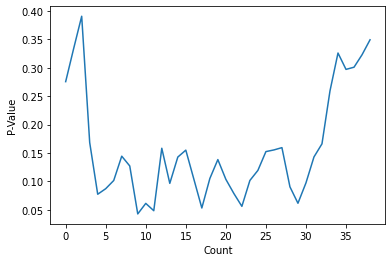

In [20]:
pvalue_plot(col="Purchase", equal_var=True)

#### Impressions 
- plot H0 hypothesis is always rejected, there is a difference

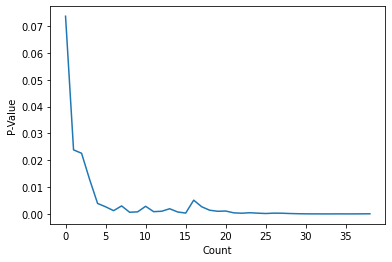

In [21]:
pvalue_plot(col="Impression", equal_var=True)

#### Click 
- After 12, H0 started to reject the hypothesis. There is a difference.

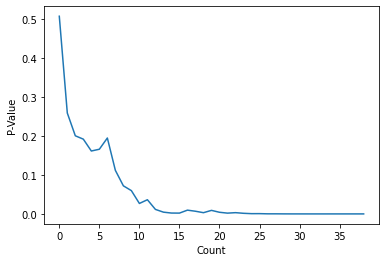

In [22]:
pvalue_plot(col="Click", equal_var=False)

#### Earning 
- After 3, H0 is rejected. There is difference.

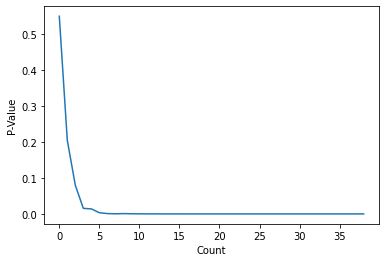

In [23]:
pvalue_plot(col="Earning", equal_var=True)

#### What is the (equal_var = True) argument?
- Equal variances assumed
- Equal variances not assumed

In [24]:
def statistics_(dataframe1,dataframe2,transaction1,transaction2):
    p=0.05
    test_stat, pvalue1 = shapiro(dataframe1[transaction1])
    test_stat, pvalue2 = shapiro(dataframe2[transaction2])
    test_stat, pvalue3 = levene(dataframe1[transaction1], dataframe2[transaction2])
    if pvalue1>p and pvalue2>p and pvalue3>p:
        test_stat, pvalue4 = ttest_ind(dataframe1[transaction1], dataframe2[transaction2],equal_var=True)
        print(f"P-Value:{pvalue4}")
        if pvalue4 > p:
            print(f"{pvalue4} This number {p}'is greater than")
        else:
            print(f"{pvalue4} This number {p}'is greater than")
    elif pvalue1>p and pvalue2>p and pvalue3<p:
        test_stat, pvalue4 = ttest_ind(dataframe1[transaction1], dataframe2[transaction2], equal_var=False)
        print(f"P-Value:{pvalue4}")
        if pvalue4 > p:
            print(f"{pvalue4} This number {p}'is greater than")
        else:
            print(f"{pvalue4} This number {p}'is less than")
    elif (pvalue1>p and pvalue2<p) or (pvalue1<p and pvalue2>p) or (pvalue1<p and pvalue2<p):
        test_stat, pvalue = mannwhitneyu(dataframe1[transaction1],
                                         dataframe2[transaction2])
        print(f"P-Value:{pvalue}")
        if pvalue>p:
            print(f"{pvalue} This number {p}'is greater than")
        else:
            print(f"{pvalue} This number {p}'is less than")

In [25]:
statistics_(data_control, data_test, "Impression", "Impression")

P-Value:4.954754307167222e-05
4.954754307167222e-05 This number 0.05'is greater than


- P-Value: 4.954754 This number 0.05'is greater than.
- There is no statistically significant difference between;
- The "Maximum Bidding" campaign control group and the "Test group" with the "Average Bidding" campaign. 
- Therefore, we recommend that you continue with the campaign that gives the "Maximum Bidding" currently used.
- Still, you can keep trying because ad views are increasing.